*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

#Compressing Data via Dimensionality Reduction

# Unsupervised dimensionality reduction via principal component analysis

## Principal Components Analysis in Sklearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings

warnings.filterwarnings('ignore')

# https://archive.ics.uci.edu/ml/datasets/wine

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, there are two options:

# import wine dataset from sklearn
#a-from sklearn.datasets import load_wine -» data = load_wine(as_frame=True)

# un-comment the following line of code to load the dataset from a local path:
#b-df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# ALTERNATIVA NRO 2 PARA CARGAR ARCHIVO

!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
vino=fetch_ucirepo(id=109)
vino

{'data': {'ids': None,
  'features':      Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
  0      14.23       1.71  2.43               15.6        127           2.80   
  1      13.20       1.78  2.14               11.2        100           2.65   
  2      13.16       2.36  2.67               18.6        101           2.80   
  3      14.37       1.95  2.50               16.8        113           3.85   
  4      13.24       2.59  2.87               21.0        118           2.80   
  ..       ...        ...   ...                ...        ...            ...   
  173    13.71       5.65  2.45               20.5         95           1.68   
  174    13.40       3.91  2.48               23.0        102           1.80   
  175    13.27       4.28  2.26               20.0        120           1.59   
  176    13.17       2.59  2.37               20.0        120           1.65   
  177    14.13       4.10  2.74               24.5         96           2.05   
  
  

In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Class label,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


<Axes: xlabel='Class label'>

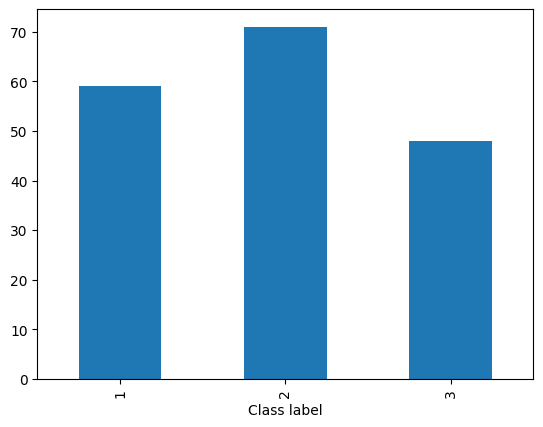

In [5]:
clas=df_wine['Class label'].value_counts(sort=False)
clas.plot(kind='bar')

In [6]:
clas

,count
Class label,
1,59
2,71
3,48


In [7]:
type(clas)

pandas.core.series.Series

In [8]:
sns.pairplot(df_wine, hue='Class label', corner=True)

Output hidden; open in https://colab.research.google.com to view.

<hr>

Splitting the data into 70% training and 30% test subsets.

In [9]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3,
                     stratify=y,
                     random_state=0)

In [10]:
type(X)

numpy.ndarray

In [11]:
type(y)

numpy.ndarray

Standardizing the data.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[ 0.71225893,  2.22048673, -0.13025864, ..., -0.20017028,
        -0.82164144, -0.62946362],
       [ 0.88229214, -0.70457155,  1.17533605, ...,  1.33982592,
         0.54931269,  1.47568796],
       [ 0.84585645, -0.73022996,  1.17533605, ...,  1.06806189,
         0.1308109 ,  1.62934866],
       ...,
       [ 1.02803489,  2.29746195, -0.5778911 , ..., -1.69487249,
        -1.86068037, -1.04434751],
       [-1.30384913, -1.08089484, -0.31677217, ...,  0.16218176,
         0.73691694,  0.40313628],
       [-0.40510216,  1.29678411,  0.05625489, ...,  1.06806189,
         0.73691694, -0.89683324]])

In [13]:
print(type(X_train_std))

<class 'numpy.ndarray'>


# ⚠️ Nota sobre la Estandarización de Datos

Un error común al trabajar con **StandardScaler** es usar `fit_transform` en el **test set** en lugar de `transform`.  

---

## 📘 Recordatorio importante
- **Entrenamiento**:  
  Se ajustan los parámetros (media y desviación estándar) con `fit_transform(X_train)`.  

- **Prueba (test set)**:  
  Se aplican **los mismos parámetros** aprendidos del entrenamiento → `transform(X_test)`.  

---

## ❌ Error típico
```python
X_test_std = sc.fit_transform(X_test)   # INCORRECTO


<br>
<br>

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
100*pca.explained_variance_ratio_

array([36.9514686 , 18.43492706, 11.81515909,  7.33425176,  6.42210782,
        5.05172448,  3.95465389,  2.64391832,  2.38931926,  1.62961377,
        1.38002112,  1.17222624,  0.82060857])

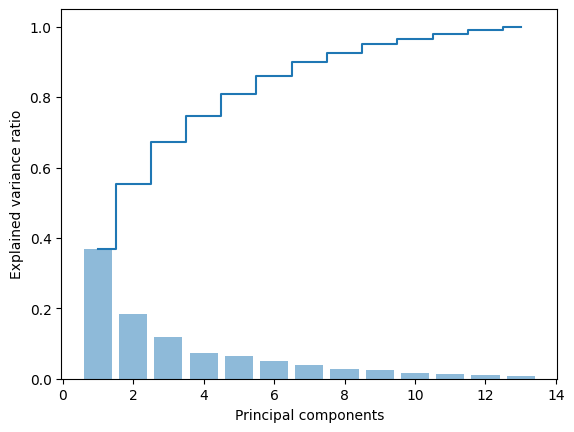

In [15]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [16]:
pca2 = PCA(n_components=2)
X_train_pca2 = pca2.fit_transform(X_train_std)
X_test_pca2 = pca2.transform(X_test_std)
X_train_pca2

array([[-2.38299011,  0.45458499],
       [ 1.96578183,  1.65376939],
       [ 2.53907598,  1.02909066],
       [ 1.43010776,  0.6024011 ],
       [-3.14147227,  0.66214979],
       [-0.50253552, -2.08907131],
       [-0.04867722, -2.27536044],
       [-2.47888989, -0.08603318],
       [-2.01900259, -1.3538719 ],
       [-0.75156583, -2.55367947],
       [-0.72268915, -1.18404391],
       [ 3.00366211,  0.94626934],
       [-2.57518878, -1.0697549 ],
       [-3.73151104,  1.01968876],
       [ 1.12276518,  0.13877   ],
       [-2.85996853,  2.28819559],
       [ 0.74717125, -3.21746061],
       [ 1.58427878,  0.16048055],
       [-3.38887101,  2.11550689],
       [-3.15405473,  0.54233966],
       [ 1.28036506, -1.72926871],
       [ 1.71438911,  0.71745249],
       [ 1.55040291, -1.7580591 ],
       [-1.10984489, -1.20480693],
       [ 0.69108418, -1.71385374],
       [ 2.086036  , -1.68453671],
       [-2.90393456,  1.95258805],
       [ 2.07635784,  1.47183304],
       [ 1.74756185,

In [17]:
X_train_pca2.shape

(124, 2)

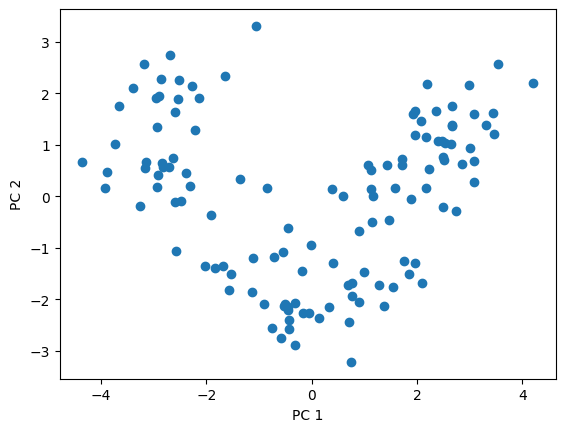

In [18]:
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [19]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

Training logistic regression classifier using the first 2 principal components.

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train_pca2, y_train)

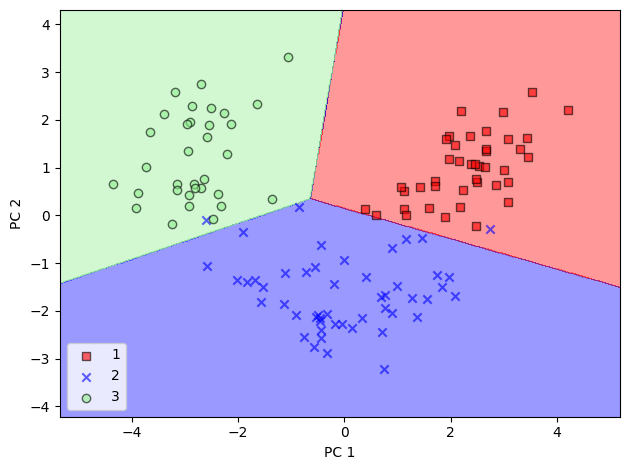

In [21]:
plot_decision_regions(X_train_pca2, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

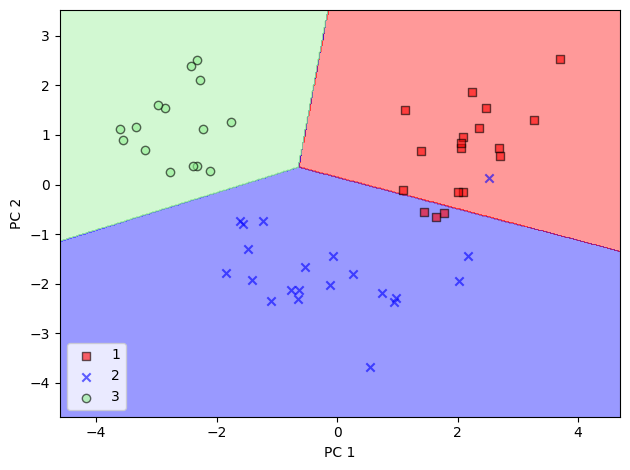

In [22]:
plot_decision_regions(X_test_pca2, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()

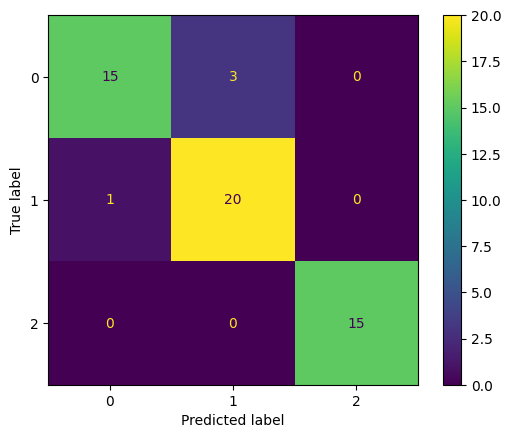

In [23]:
# Confusion matrix

y_pred=lr.predict(X_test_pca2)
cm = confusion_matrix(y_test, y_pred) #, normalize='all')
ConfusionMatrixDisplay(cm).plot()

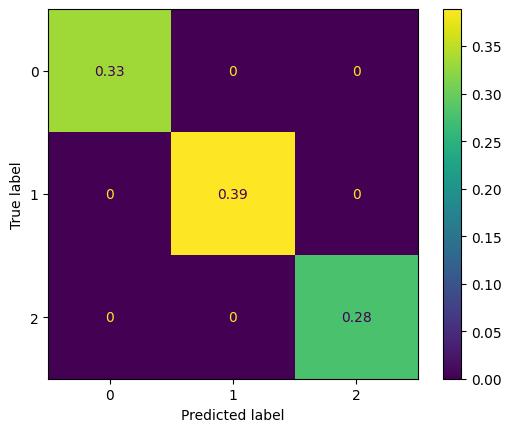

In [24]:
# compare with non-pca data

lr_nopca = LogisticRegression()
lr_nopca=lr_nopca.fit(X_train_std, y_train)
y_pred_nopca=lr_nopca.predict(X_test_std)
cm_no = confusion_matrix(y_test, y_pred_nopca, normalize='all')
ConfusionMatrixDisplay(cm_no).plot()

<br>
<br>

# Supervised data compression via linear discriminant analysis

## Principal component analysis versus linear discriminant analysis

In [25]:
#Image(filename='images/05_06.png', width=400)

NameError: name 'Image' is not defined

<br>
<br>

## LDA via scikit-learn

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_train_lda

array([[ 2.96463525e+00,  1.15696578e+00],
       [-3.35009835e+00,  2.07089788e+00],
       [-3.06163017e+00,  1.09368358e+00],
       [-2.73298160e+00,  1.49363859e+00],
       [ 3.54607454e+00,  9.92205527e-01],
       [-1.65265822e-02, -2.95671405e+00],
       [ 2.65217532e-01, -3.71080577e+00],
       [ 3.35455379e+00,  1.41853278e-01],
       [ 8.27887672e-01, -1.91824846e+00],
       [ 1.47271886e+00, -3.92230732e+00],
       [ 5.55260633e-01, -1.77931039e+00],
       [-4.41646387e+00,  2.29291397e+00],
       [ 1.89893873e+00, -7.66042417e-01],
       [ 5.49795276e+00,  1.46407663e+00],
       [-2.00548346e+00,  9.01662907e-01],
       [ 4.66436578e+00,  2.64522287e+00],
       [-1.13237281e-01, -5.06124163e+00],
       [-3.19851190e+00,  3.82628514e-01],
       [ 4.08602659e+00,  3.54626880e+00],
       [ 3.44812085e+00,  1.16866440e+00],
       [ 6.84407007e-01, -3.69783272e+00],
       [-3.34974226e+00,  2.11208901e+00],
       [-1.83687080e+00, -2.28371487e+00],
       [ 6.

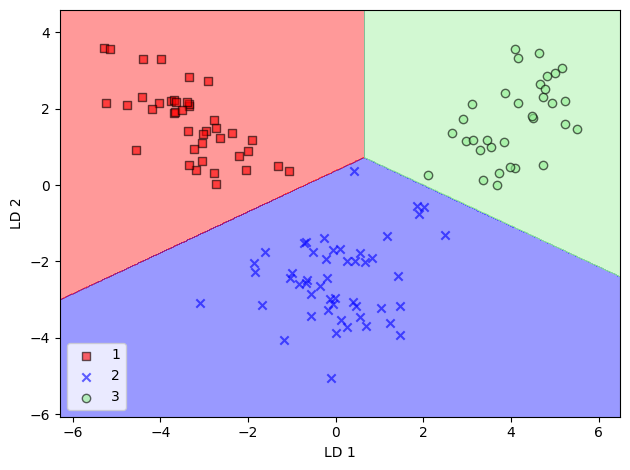

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_lda = lr.fit(X_train_lda, y_train)

plot_decision_regions(X_train_lda, y_train, classifier=lr_lda)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_09.png', dpi=300)
plt.show()

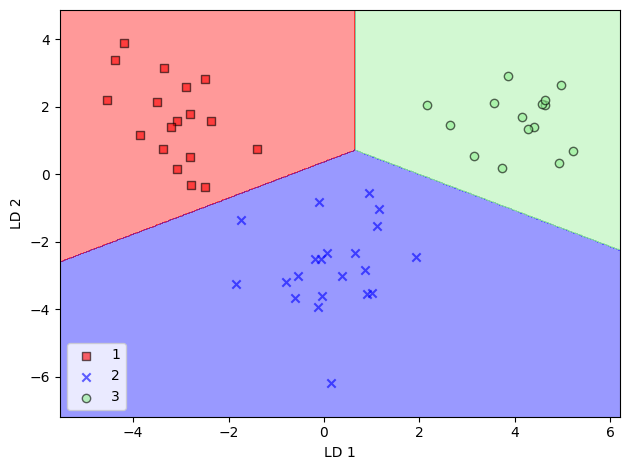

In [28]:
X_test_lda = lda.transform(X_test_std)

plot_decision_regions(X_test_lda, y_test, classifier=lr_lda)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_10.png', dpi=300)
plt.show()

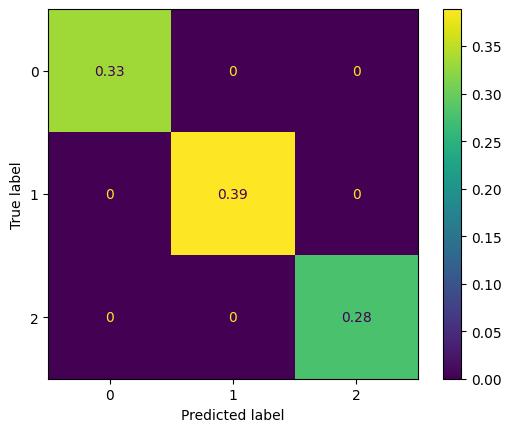

In [29]:
# Confusion matrix

y_pred_lda=lr_lda.predict(X_test_lda)
cm_lda = confusion_matrix(y_test, y_pred_lda, normalize='all')
ConfusionMatrixDisplay(cm_lda).plot()

# BONUS 1

<br>
<br>

In [30]:
df_wine2=df_wine.set_index('Class label')
df_wine2


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [31]:
# https://towardsdatascience.com/outlier-detection-using-principal-component-analysis-and-hotellings-t2-and-spe-dmodx-methods-625b3c90897
# https://erdogant.github.io/pca/pages/html/index.html

! pip install pca

# Import library
from pca import pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.4/190.4 kB 10.0 MB/s eta 0:00:00


In [32]:
# Initialize pca to also detected outliers.
model_out = pca(normalize=True, detect_outliers=['ht2', 'spe'], n_std=2)

# Fit and transform
results_out = model_out.fit_transform(df_wine2)


[14-08-2025 22:58:53] [pca.pca] [INFO] Extracting column labels from dataframe.
[14-08-2025 22:58:53] [pca.pca] [INFO] Extracting row labels from dataframe.
[14-08-2025 22:58:53] [pca.pca] [INFO] Normalizing input data per feature (zero mean and unit variance)..
[14-08-2025 22:58:53] [pca.pca] [INFO] PCA reduction performed to capture 95.0% explained variance using 13 columns of the input data.
[14-08-2025 22:58:53] [pca.pca] [INFO] Fit using PCA.
[14-08-2025 22:58:53] [pca.pca] [INFO] Compute loadings and PCs.
[14-08-2025 22:58:53] [pca.pca] [INFO] Compute explained variance.
[14-08-2025 22:58:53] [pca.pca] [INFO] Number of components is 10 that covers 95.00% explained variance.
[14-08-2025 22:58:53] [pca.pca] [INFO] The PCA reduction is performed on the 13 columns of the input dataframe.
[14-08-2025 22:58:53] [pca.pca] [INFO] Fit using PCA.
[14-08-2025 22:58:53] [pca.pca] [INFO] Compute loadings and PCs.
[14-08-2025 22:58:53] [pca.pca] [INFO] Outlier detection using Hotelling T2 test

In [33]:
results_out

{'loadings':        Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
 PC1   0.144329   -0.245188 -0.002051          -0.239320   0.141992   
 PC2   0.483652    0.224931  0.316069          -0.010591   0.299634   
 PC3  -0.207383    0.089013  0.626224           0.612080   0.130757   
 PC4  -0.017856    0.536890 -0.214176           0.060859  -0.351797   
 PC5  -0.265664    0.035214 -0.143025           0.066103   0.727049   
 PC6   0.213539    0.536814  0.154475          -0.100825   0.038144   
 PC7  -0.056396    0.420524 -0.149171          -0.286969   0.322883   
 PC8   0.396139    0.065827 -0.170260           0.427970  -0.156361   
 PC9  -0.508619    0.075283  0.307694          -0.200449  -0.271403   
 PC10  0.211605   -0.309080 -0.027125           0.052799   0.067870   
 
       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
 PC1        0.394661    0.422934             -0.298533         0.313429   
 PC2        0.065040   -0.003360              0.028779 

In [34]:
type(results_out)

dict

In [35]:
# Print outliers
print(type(results_out['outliers']))
print(results_out['outliers'])

<class 'pandas.core.frame.DataFrame'>
     y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
1   0.982875  0.376726  21.351215   False       False     3.617239
1   0.982875  0.624371  17.438087   False       False     2.234477
1   0.982875  0.589438  17.969195   False       False     2.719789
1   0.982875  0.134454  27.028857   False        True     4.659735
1   0.982875  0.883264  12.861094   False       False     1.332104
..       ...       ...        ...     ...         ...          ...
3   0.982875  0.147396  26.583414   False        True     4.033903
3   0.982875  0.771408  15.087004   False       False     3.139750
3   0.982875  0.244157  23.959708   False        True     3.846217
3   0.982875  0.333600  22.128104   False       False     3.312952
3   0.982875  0.138437  26.888278   False        True     4.238283

[178 rows x 6 columns]


In [36]:
print(results_out['outliers']['y_bool'])

1    False
1    False
1    False
1    False
1    False
     ...  
3    False
3    False
3    False
3    False
3    False
Name: y_bool, Length: 178, dtype: bool


[14-08-2025 23:04:51] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[14-08-2025 23:04:51] [scatterd.scatterd] [INFO] Create scatterplot
[14-08-2025 23:04:51] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[14-08-2025 23:04:51] [scatterd.scatterd] [INFO] Create scatterplot


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,


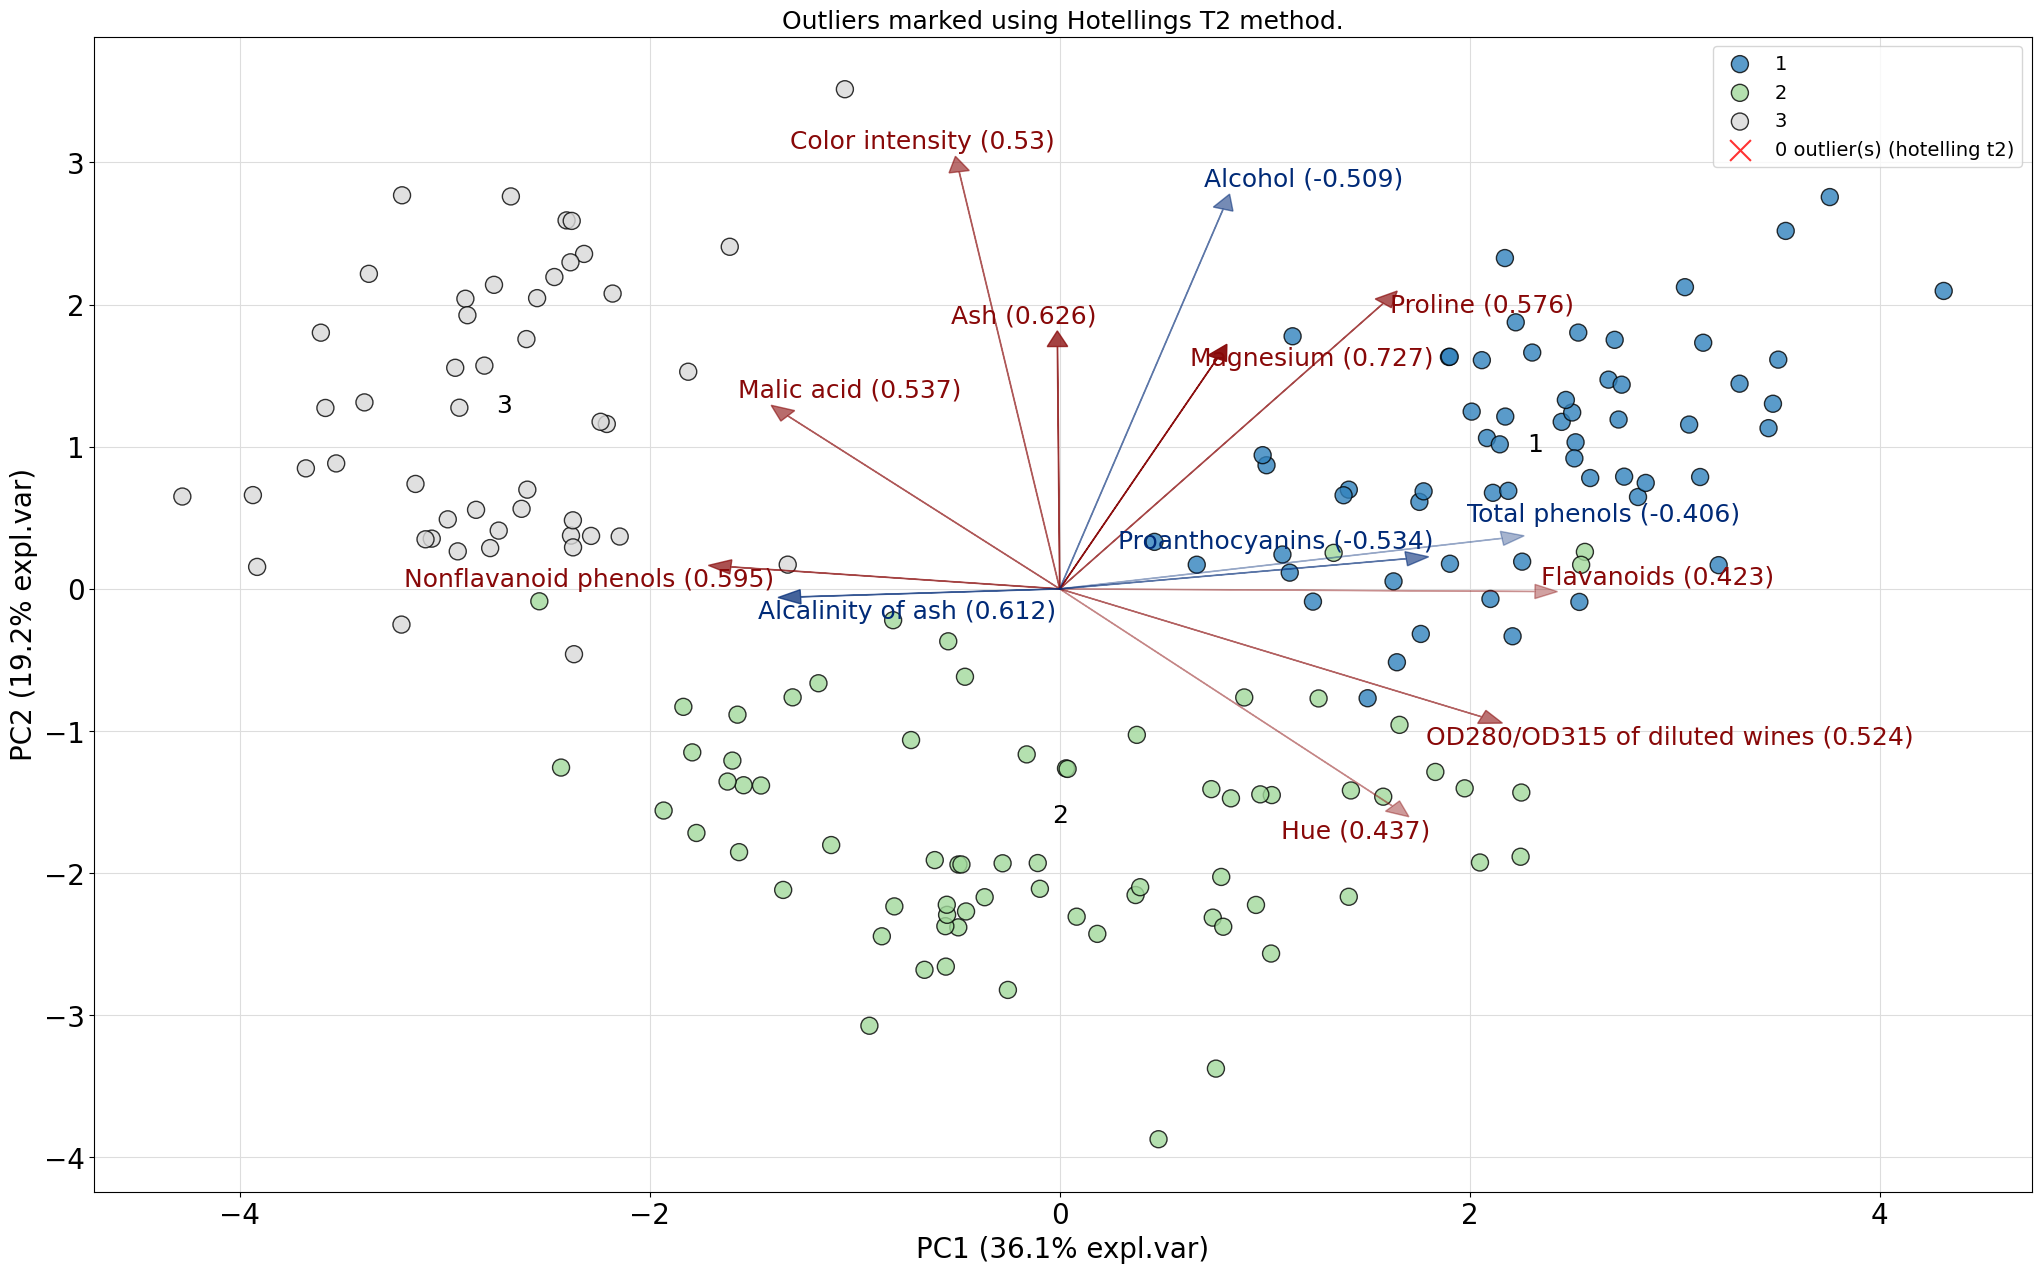

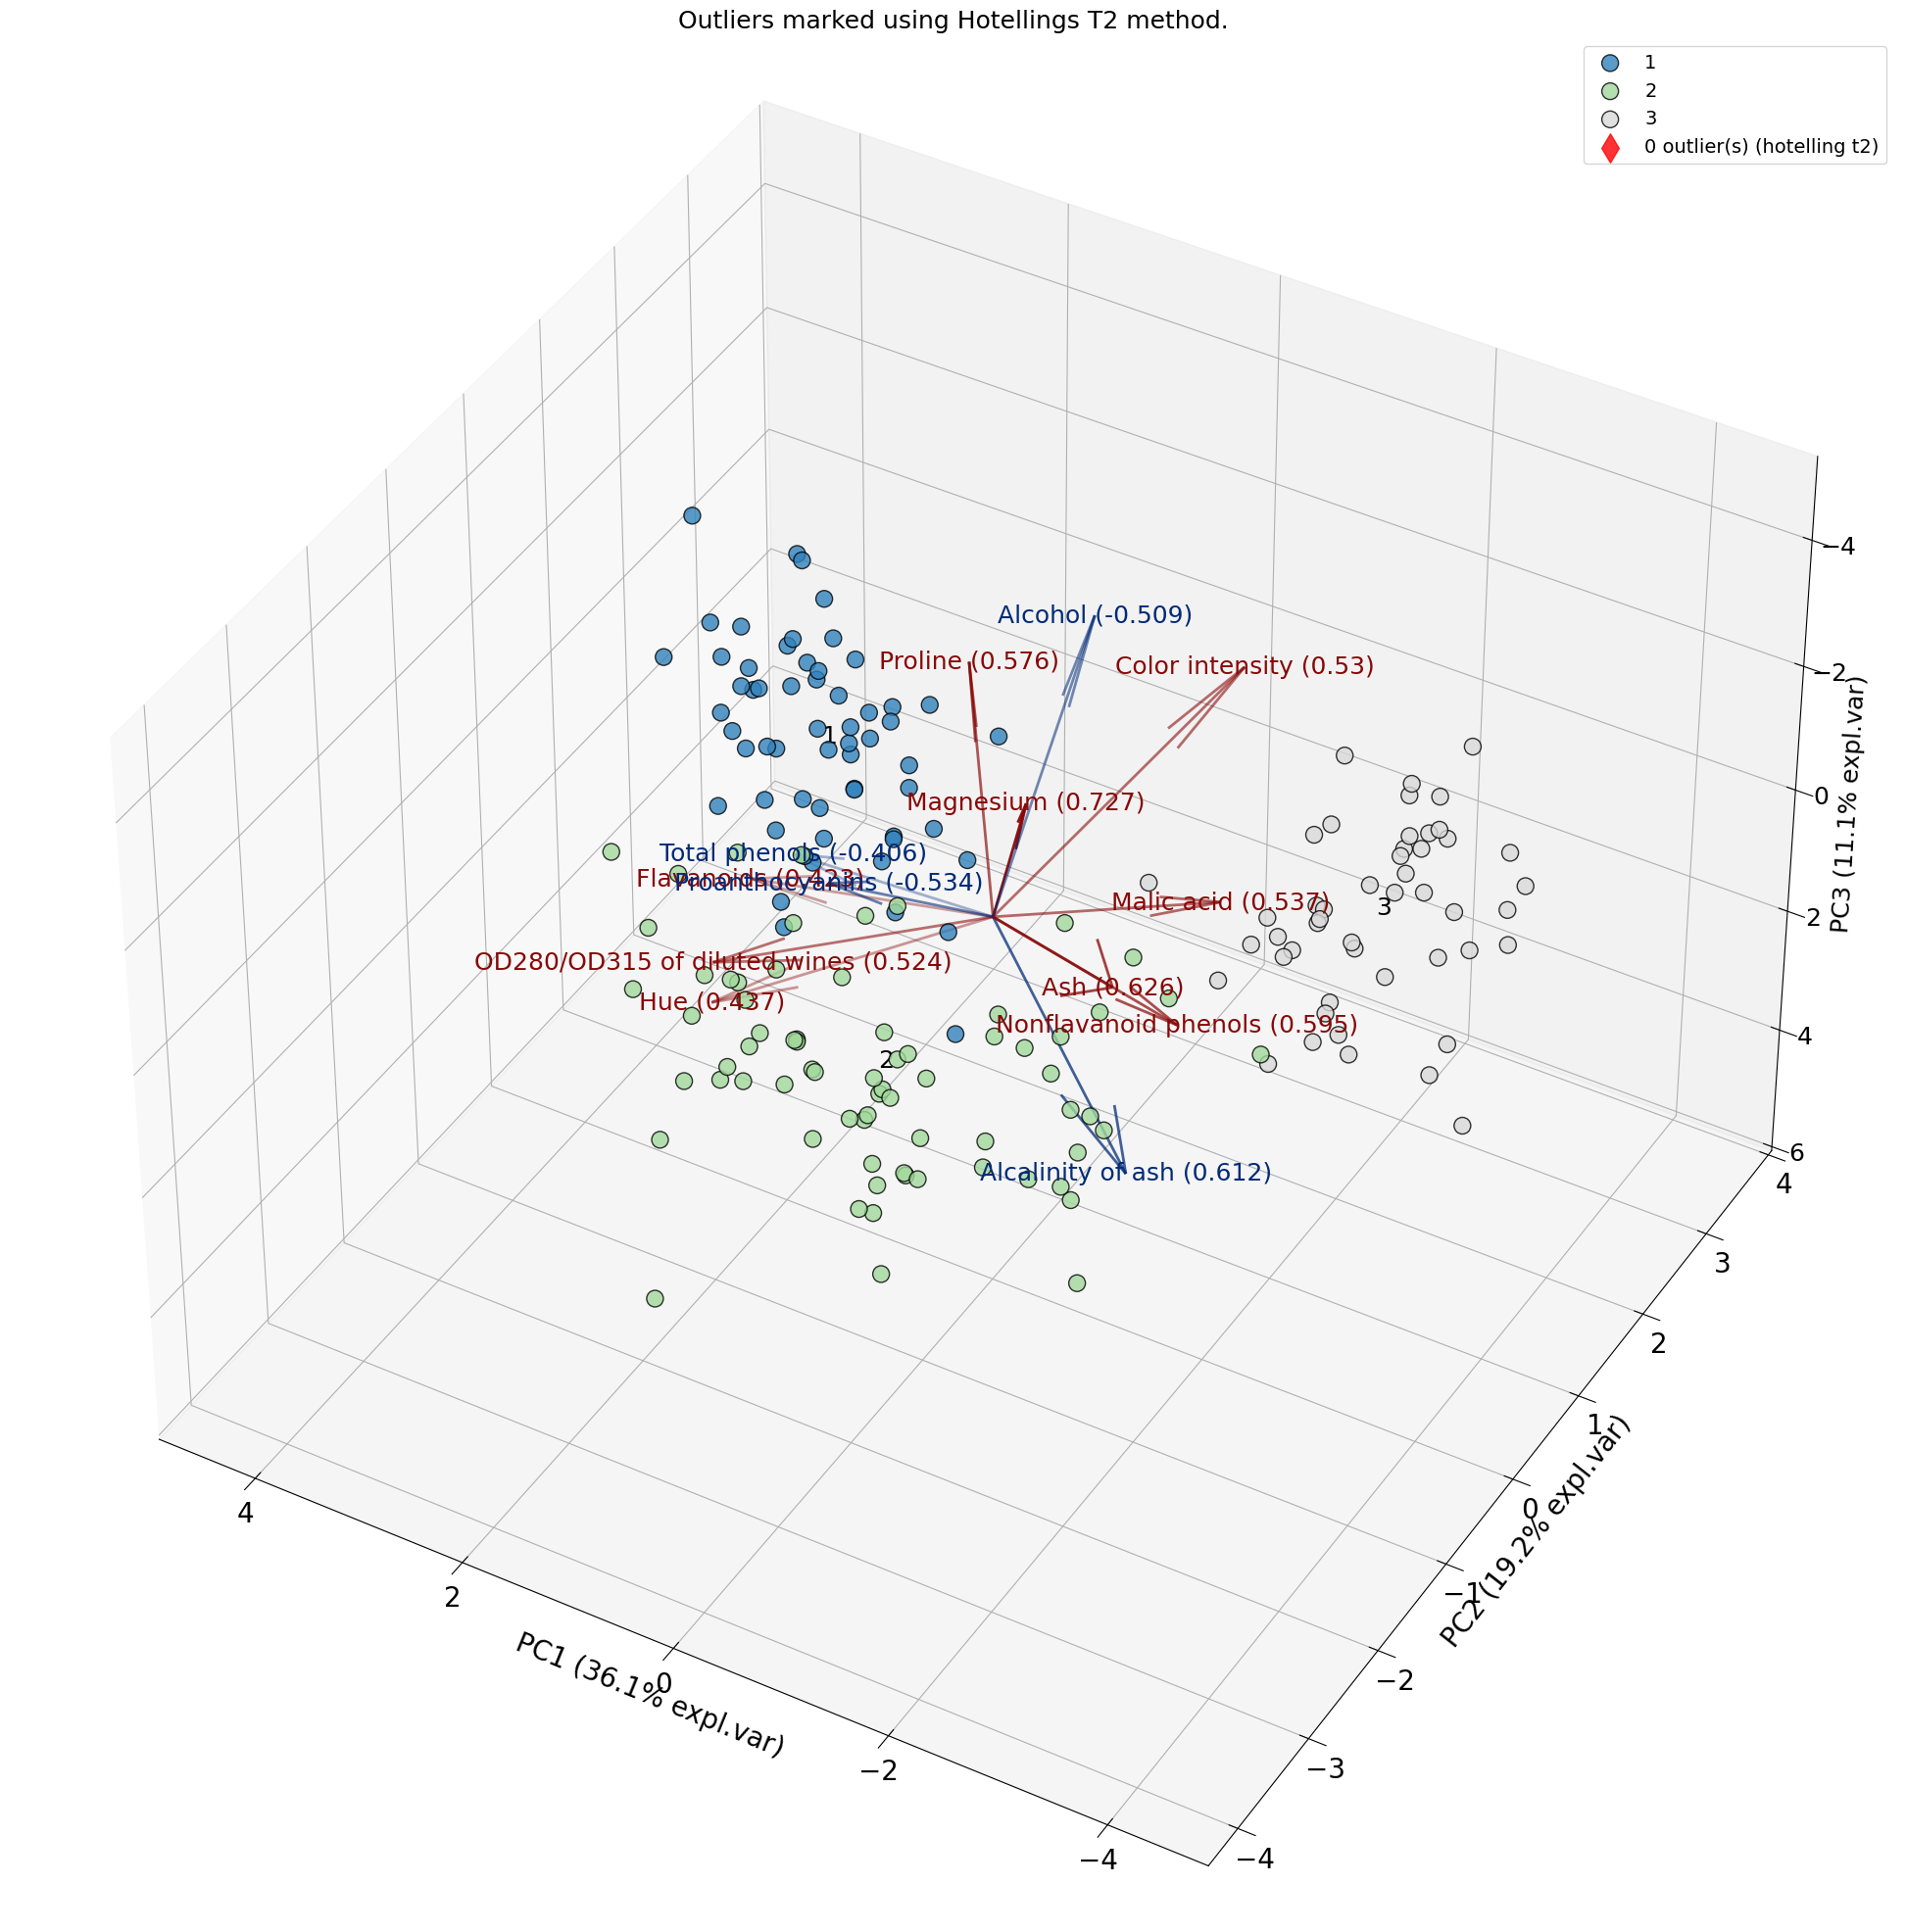

In [37]:
# Plot Hotellings T2
model_out.biplot(SPE=False, HT2=True, title='Outliers marked using Hotellings T2 method.')

# Make a plot in 3 dimensions
model_out.biplot3d(SPE=False, HT2=True, title='Outliers marked using Hotellings T2 method.')

# Get the outliers using SPE/DmodX method.
df_wine2.loc[results_out['outliers']['y_bool'], :]

[14-08-2025 23:07:05] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[14-08-2025 23:07:05] [scatterd.scatterd] [INFO] Create scatterplot
[14-08-2025 23:07:05] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[2]
[14-08-2025 23:07:05] [pca.pca] [INFO] Plot PC1 vs PC2 vs PC3 with loadings.
[14-08-2025 23:07:05] [scatterd.scatterd] [INFO] Create scatterplot


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.5,1.20,3.00,1547
1,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.7,1.23,2.82,1680
2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.5,1.38,3.12,278
2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407
3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.9,0.58,1.33,415
3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.9,0.60,1.48,725
3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.0,0.57,1.96,660
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


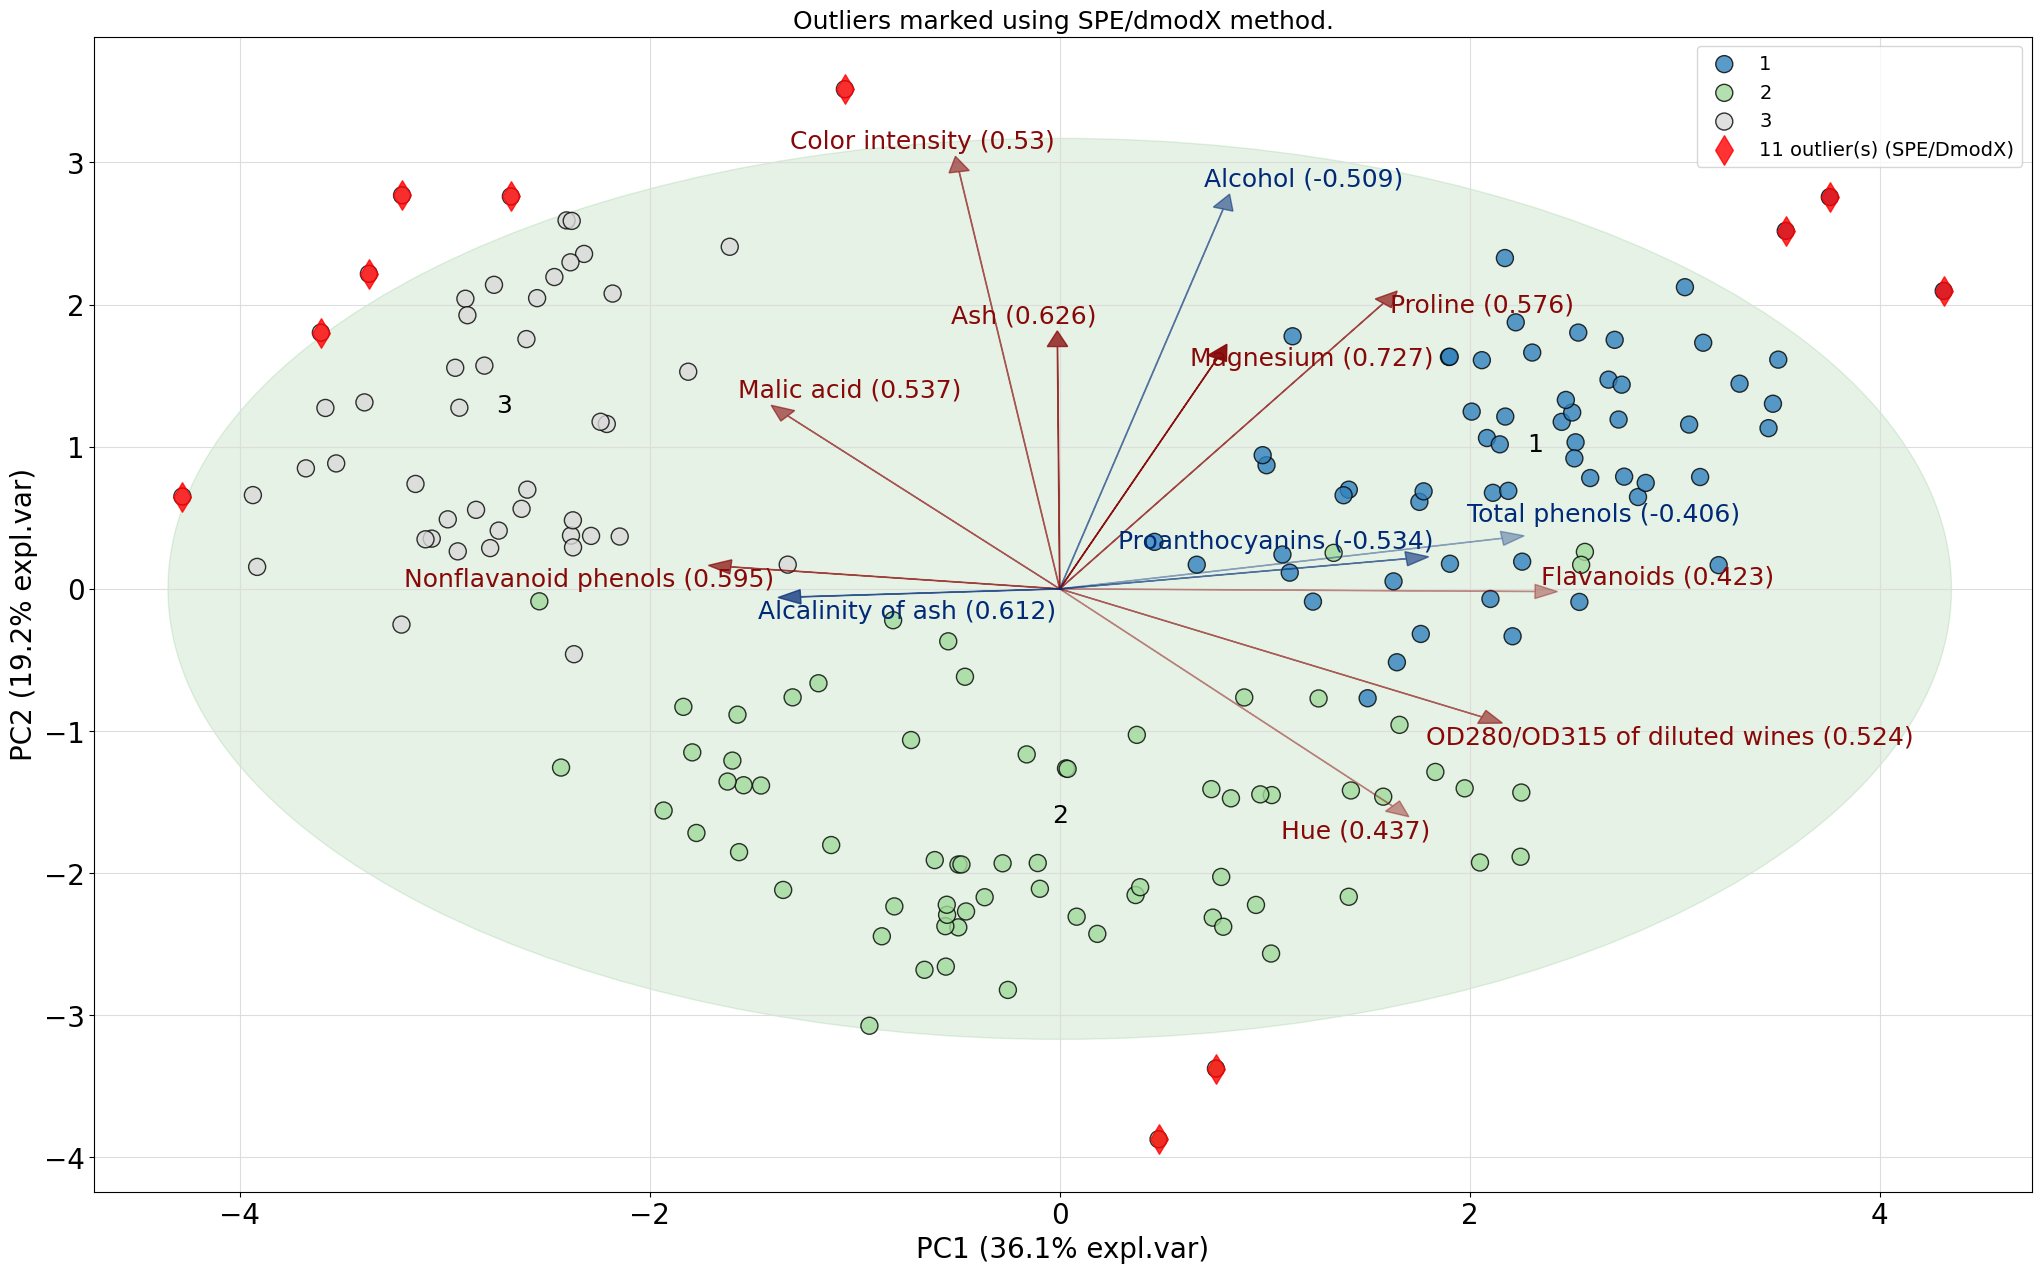

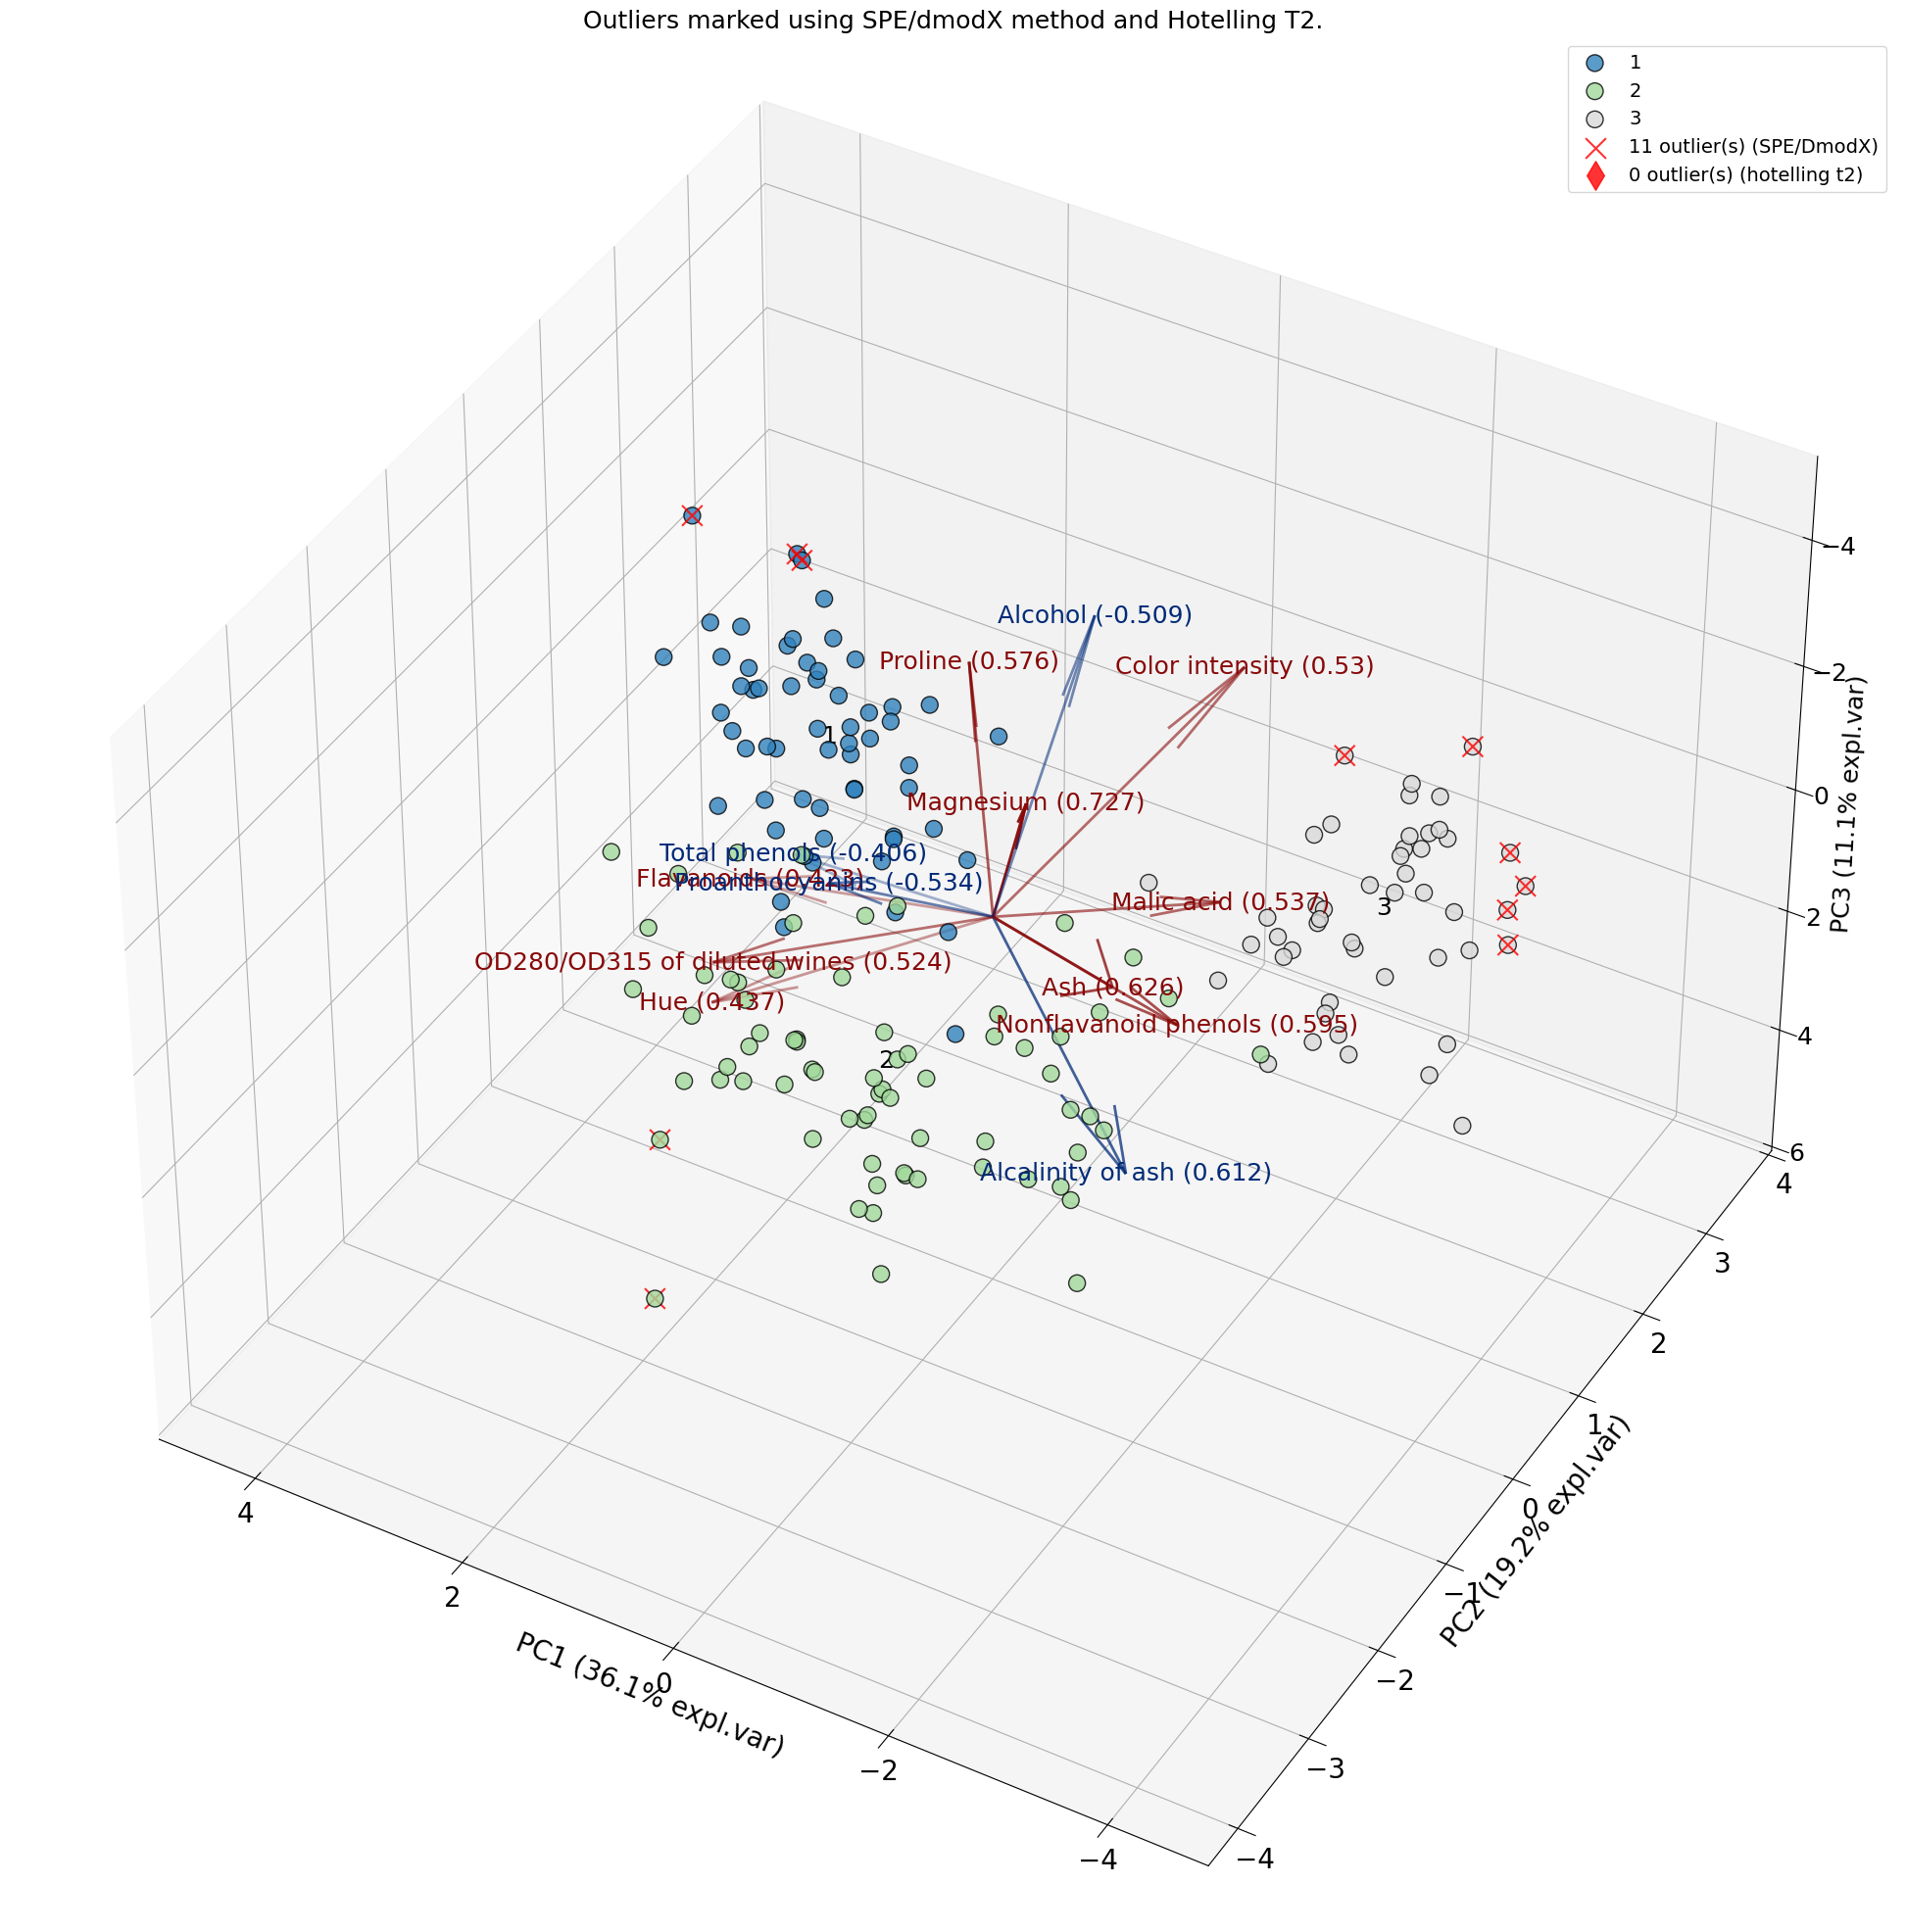

In [38]:
# Plot SPE/DmodX method
model_out.biplot(SPE=True, HT2=False, title='Outliers marked using SPE/dmodX method.')

# Make a plot in 3 dimensions
model_out.biplot3d(SPE=True, HT2=True, title='Outliers marked using SPE/dmodX method and Hotelling T2.')

# Get the outliers using SPE/DmodX method.
df_wine2.loc[results_out['outliers']['y_bool_spe'], :]

In [39]:
# Grab overlapping outliers
I_overlap = np.logical_and(results_out['outliers']['y_bool'], results_out['outliers']['y_bool_spe'])

# Print overlapping outliers
df_wine2.loc[I_overlap, :]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class label,,,,,,,,,,,,,


# BONUS 2


## Kernel principal component analysis in scikit-learn

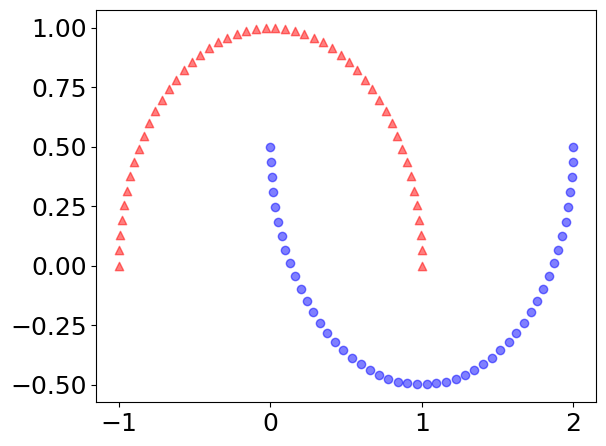

In [40]:
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()


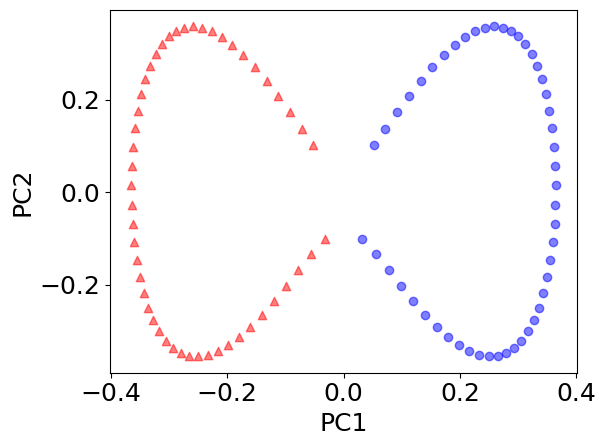

In [41]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
# plt.savefig('images/05_19.png', dpi=300)
plt.show()